#### Scikit Learn (Training a Perceptron)
##### Submitted by: Lance Dominic C. Raquel

##### Part I – Importing the Dataset and Select Income and Spending Score as Features (5 pts.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore")

##### 1.) Import the Mall_Customers2.csv in Python and store it as numpy.

In [18]:
df = pd.read_csv('Mall_Customers2.csv')
df

,Unnamed: 0,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,0,1,Male,19,15,39,3
1,1,2,Male,21,15,81,2
2,2,3,Female,20,16,6,3
3,3,4,Female,23,16,77,2
4,4,5,Female,31,17,40,3
...,...,...,...,...,...,...,...
195,195,196,Female,35,120,79,1
196,196,197,Female,45,126,28,4
197,197,198,Male,32,126,74,1
198,198,199,Male,32,137,18,4


##### 2.) From the data set select Income and Spending score as features.

In [5]:
X = df.loc[:,'Income':'Spending Score']
X

,Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##### 3.) Select the Cluster column as the target values for each sample. Don’t forget to use .astype() to cast the pandas object to a specified dtype.

In [6]:
y = df.loc[:,'Clusters'].astype('category')
y

0      3
1      2
2      3
3      2
4      3
      ..
195    1
196    4
197    1
198    4
199    1
Name: Clusters, Length: 200, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

##### 4.) Print the class labels of the target values.

In [8]:
for i in y.unique():
  print(f'Class: {i}')

Class: 3
Class: 2
Class: 0
Class: 1
Class: 4


#### Part III – Training the Perceptron (5 pts.)

##### 1. Split the dataset to training data and test set with 30% test size and random state 1.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y_train: [57 27 15 16 25]
Labels count in y_test: [24 12  7  7 10]


##### 2. Implement the feature scaling method.

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

##### 3. Train the perceptron by fitting the train data set using the Perceptron class and fit method from the linear_module with 40 iterations, 0.1 learning rate, random_state=1

In [12]:
ppn = Perceptron(n_iter_no_change = 40, eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, n_iter_no_change=40, random_state=1)

#### Part IV – Evaluate the Perceptron Model (5 pts.)
##### 1. Count the number of misclassified samples.

In [13]:
y_pred = ppn.predict(X_test_std)
print(f'Misclassified samples: {(y_test != y_pred).sum()}')

Misclassified samples: 2


##### 2. Print the accuracy of the Perceptron model.

In [14]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Accuracy: {ppn.score(X_test_std, y_test):.2f}')

Accuracy: 0.97
Accuracy: 0.97


#### Part V – Plotting the decision regions and the Data (15 pts.)
##### 1. Plot the different decision regions using Matplot. Set the Income (standardized) as the x-axis and the Spending Score (standardized) as the y-axis

##### 2. Visualize how well the decision regions separate the different samples in the plot. Use different colors and markers for the different class types for the scatter plot of the samples.

##### 3. Highlight the test samples by encircling them.

##### 4. Put a legend that labels the class types of the different shapes in the scatter plot.

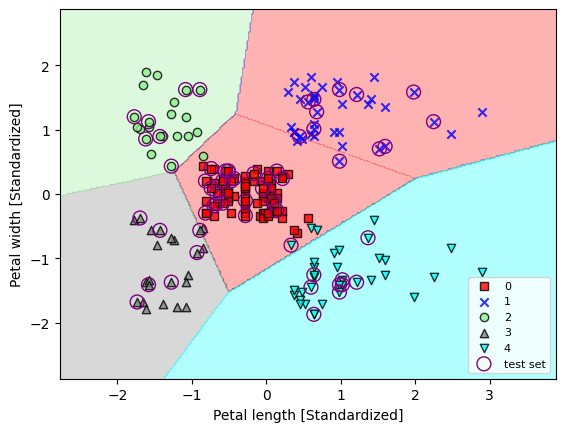

In [36]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,
                c = colors[idx], marker = markers[idx], label = cl,
                edgecolor = 'black')

  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c= 'None', edgecolor = 'Purple',
                alpha = 1.0, linewidth = 1, marker = 'o', s = 100,
                label = 'test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(140,200))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc = 'lower right', fontsize = "8")
plt.show()